In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (nc_tools,viz_tools,)

%matplotlib inline

In [2]:
tracers = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-code/NEMOGCM/CONFIG/SalishSea_TRC/EXP00/SalishSea_1h_20121214_20121214_ptrc_T.nc')

In [3]:
nc_tools.show_variables(tracers)

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'time_counter_bnds', u'TR_Clover', u'TR_Macaulay', u'TR_Iona', u'TR_Nanaimo', u'TR_Campbell']


In [4]:
trc1=tracers.variables['TR_Clover'][:]
trc2=tracers.variables['TR_Macaulay'][:]
trc3=tracers.variables['TR_Iona'][:]
trc4=tracers.variables['TR_Nanaimo'][:]
trc5=tracers.variables['TR_Campbell'][:]

print ('%s'%np.max(trc1[0,23,:,:]))
trc1.shape

0.360024


(24, 40, 898, 398)

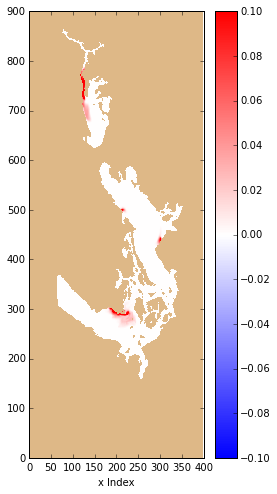

In [15]:
level = 20
t = 23
trctotal = (trc1[t,level] + trc2[t,level] + trc3[t,level] 
            + trc4[t,level] + trc5[t,level])
fig, ax = plt.subplots(1, 1, figsize=(4, 8), sharey=True)
cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
    

ssh_t = np.ma.masked_equal(trctotal, 0)
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh_t, cmap=cmap, vmin=-0.1, vmax=0.1)
cbar = fig.colorbar(mesh, ax=ax)
ax.set_xlabel('x Index')
axs.set_ylabel('y Index')
#cbar.set_label('{label} [{units}]'.format(label=ssh.long_name.title(), units=ssh.units))

Above: sum of the five tracers, at 20 m, at 24hours.

##Early Testing Cells

In [10]:
np.max(trc2[:,:,:,:])

0.98278022

In [11]:
np.max(trc3[:,:,:,:])

0.0

In [12]:
np.max(trc4[:,:,:,:])

0.98868978

In [13]:
np.max(trc5[:,:,:,:])

0.98280138

In [3]:
rtracers = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-code/NEMOGCM/CONFIG/SalishSea_TRC/EXP00/SalishSea_00000090_restart_trc.nc')

In [4]:
nc_tools.show_variables(rtracers)

[u'nav_lon', u'nav_lat', u'nav_lev', u'time_counter', u'kt', u'ndastp', u'adatrj', u'rdttrc1', u'TRNTR_Clover', u'TRNTR_Macaulay', u'TRNTR_Iona', u'TRNTR_Nanaimo', u'TRNTR_Campbell', u'TRBTR_Clover', u'TRBTR_Macaulay', u'TRBTR_Iona', u'TRBTR_Nanaimo', u'TRBTR_Campbell']


In [5]:
Clover = rtracers.variables['TRBTR_Clover'][:]
Macaulay = rtracers.variables['TRBTR_Macaulay'][:]
Iona = rtracers.variables['TRBTR_Iona'][:]
Nanaimo = rtracers.variables['TRBTR_Nanaimo'][:]
Campbell = rtracers.variables['TRBTR_Campbell'][:]

In [35]:
print(Nanaimo.shape)

(1, 40, 898, 398)


In [9]:
for i in range(40):
    print(i, np.max(Campbell[:,i]))

0 0.0190354670976
1 0.0197193720514
2 0.0211010109812
3 0.0232081884658
4 0.0260824792617
5 0.0297790750861
6 0.0343665972279
7 0.039926922802
8 0.0465551488156
9 0.0543599900289
10 0.0634652832838
11 0.0740140832852
12 0.0861786220601
13 0.100183182988
14 0.116355237145
15 0.135238385164
16 0.157841569954
17 0.186193980722
18 0.22461192902
19 0.282704798132
20 0.382515088494
21 0.574858191304
22 0.997756303952
23 0.937816314015
24 0.00231261799083
25 0.000427292136828
26 1.03278313193e-32
27 4.09282477712e-68
28 2.40078315123e-82
29 3.9489447784e-91
30 1.82088502296e-98
31 3.32029978248e-106
32 9.30518841797e-114
33 1.04419675029e-131
34 1.19454448297e-163
35 1.24711847072e-249
36 1.49138329217e-296
37 1.85876445713e-298
38 0.0
39 0.0


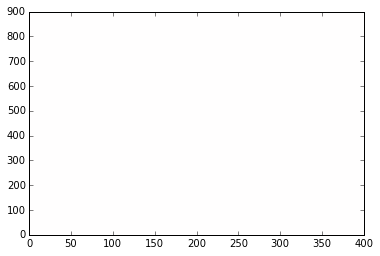

In [10]:
level = 22
cmap = plt.get_cmap('bwr')
vmin = -1; vmax = 1
plt.pcolormesh(Campbell[0,level], vmin=vmin, vmax=vmax, cmap=cmap)

In [11]:
print(Campbell.shape)
for i in range(898):
    for j in range(398):
        if Campbell[0,level,i,j] > 0.1:
            print(i,j,Campbell[0,level,i,j])

(1, 40, 898, 398)
751 125 0.997756303952


<matplotlib.colorbar.Colorbar instance at 0x7f1756a631b8>

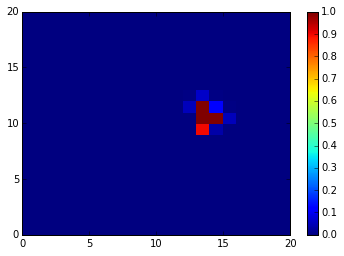

In [42]:
plt.pcolormesh(Nanaimo[0,level,490:510,200:220])
plt.colorbar()